In [3]:
# pip install plotly
# !pip install -U kaleido
# !pip install tensorflow

In [1]:
# pip install tensorflow


In [2]:
import tensorflow as tf


2024-07-07 06:46:13.161082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 06:46:13.191297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 06:46:13.191346: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 06:46:13.210741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-07 06:46:14.442113: W tensorflow/com

## *Importing the required libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import os ,sys
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
target_dir = os.path.abspath(os.path.join(os.getcwd(), '..' ))
sys.path.append(target_dir)

from Models.RNNLSTMTensorFlow.Model import build_lstm_model ,train_model
from Models.RNNLSTMTensorFlow.inference import forecast
from Models.RNNLSTMTensorFlow.preprocessing import  create_dataset ,preprocess_data
from Models.RNNLSTMTensorFlow.plot import * 
from Models.RNNLSTMTensorFlow.evaluation import *
import gc
from Models.RNNLSTMTensorFlow.plot import plot_visualization
from Models.RNNLSTMTensorFlow.inference import forecast

import pandas as pd
import numpy as np


## *Reading the Data**

In [4]:
daily_traffic_accident_data_path = '../data/processed/daily_data.csv'
daily_accident_df = pd.read_csv(daily_traffic_accident_data_path)
daily_accident_df

daily  daily_accident
0     2018-01-01             234
1     2018-01-02             408
2     2018-01-03             231
3     2018-01-04             225
4     2018-01-05             342
...          ...             ...
1821  2022-12-27             183
1822  2022-12-28             177
1823  2022-12-29             191
1824  2022-12-30             193
1825  2022-12-31             179

[1826 rows x 2 columns]

## *Feature Engineering of the data*

In [5]:

time_series_data = daily_accident_df['daily_accident'].values

# Preprocess the data
scaled_data, scaler = preprocess_data(time_series_data)

time_steps = 10
future_step = 10
# Create the dataset
X, y = create_dataset(scaled_data, time_steps,future_step)


## *Spliting data into train ,validation and testing*

In [6]:

# Split the data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Further split training data into training and validation sets
split_index = int(len(X_train) * 0.8)
X_train, X_val = X_train[:split_index], X_train[split_index:]
y_train, y_val = y_train[:split_index], y_train[split_index:]

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Print the shapes
print("X_train shape:", X_train.shape)
print('y train shape : ',y_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1155, 10, 1)
y train shape :  (1155, 10)
X_val shape: (289, 10, 1)
X_test shape: (362, 10, 1)


## *Training the Model*

In [14]:
model_name

'../pkl_tensorflow/units_64_batch_size_32_epochs_100_output_steps_10.keras'

In [13]:
parent_dir_for_saving_model = os.path.join("..","pkl_tensorflow")
os.makedirs(parent_dir_for_saving_model,exist_ok=True)

units = 64
epochs = 100
batch_size = 32
output_steps = future_step

list_of_trained_best_models = os.listdir(parent_dir_for_saving_model)
model_config = f"units_{units}_batch_size_{batch_size}_epochs_{epochs}_output_steps_{output_steps}"
model_name = f"{parent_dir_for_saving_model}/{model_config}.keras"

if model_config in list_of_trained_best_models:
    print('Loading already trained Model')
    model = tf.keras.models.load_model(model_name)
else:
    print('Training Fresh Model')
    model = build_lstm_model((X_train.shape[1], 1), units,output_steps)
    history = train_model(model, X_train, y_train, X_val, y_val, epochs, batch_size)
    
    model.save(model_name)



Training Fresh Model
Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2275 - val_loss: 0.1073
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1181 - val_loss: 0.1046
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1160 - val_loss: 0.1059
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1180 - val_loss: 0.1045
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1171 - val_loss: 0.1049
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1188 - val_loss: 0.1046
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1165 - val_loss: 0.1047
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1191 - val_loss: 0.1047
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1173 - val_loss: 0.1046
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1157 - val_loss: 0.1050
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1165 - val_loss: 0.1046
Epoch 12/100
37/37 ━━━━━━━━━━━━

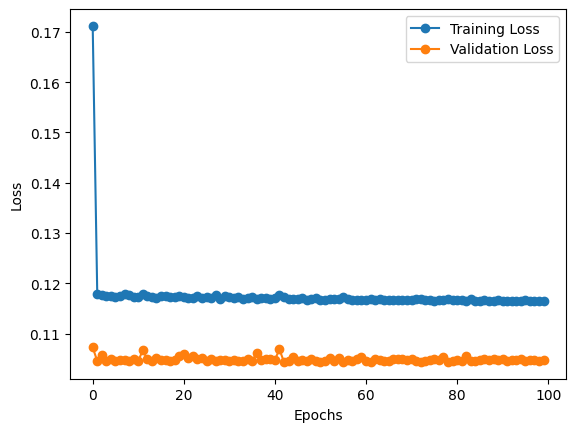

In [15]:
# Plot training loss and validation loss
plt.plot(model.history.history['loss'], label='Training Loss',marker='o')
plt.plot(model.history.history['val_loss'], label='Validation Loss',marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

[INFO] Evaluation of RNN-LSTM Model
window_size :60
Horzan : 611
Evaluation of input window : 60 & Horizon : 611
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

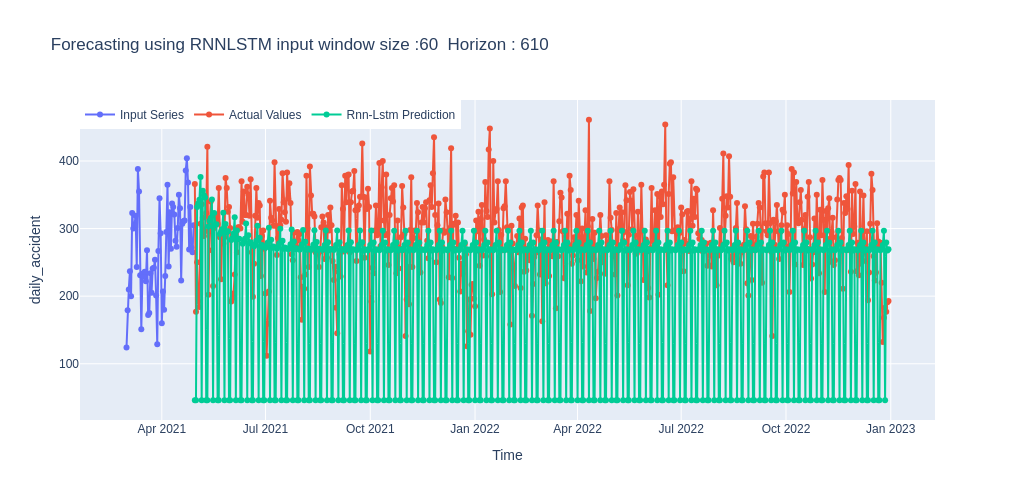

window_size :120
Horzan : 551
Evaluation of input window : 120 & Horizon : 551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━

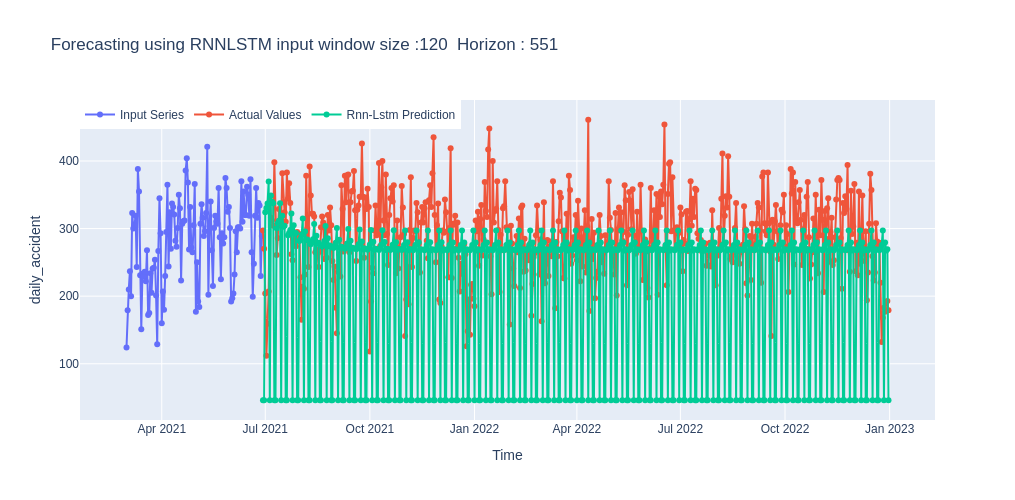

window_size :180
Horzan : 491
Evaluation of input window : 180 & Horizon : 491
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━

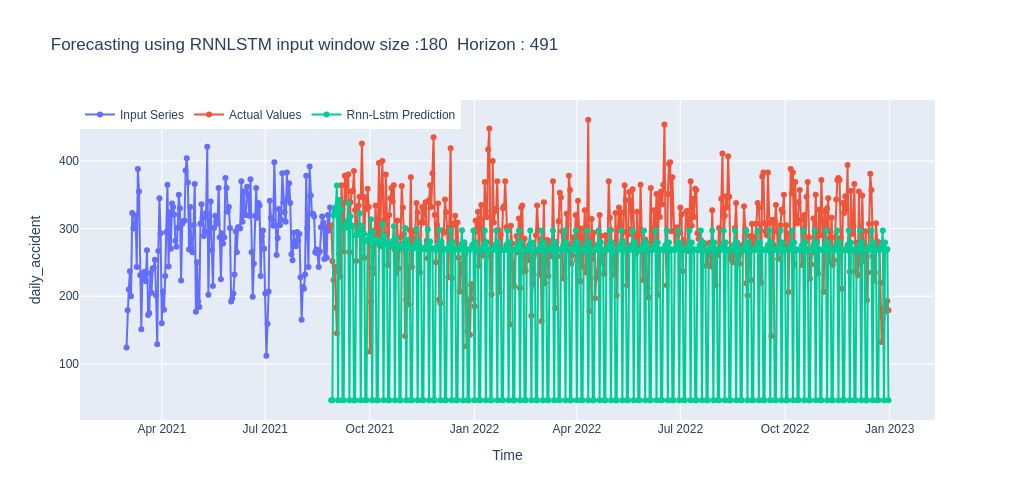

window_size :240
Horzan : 431
Evaluation of input window : 240 & Horizon : 431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━

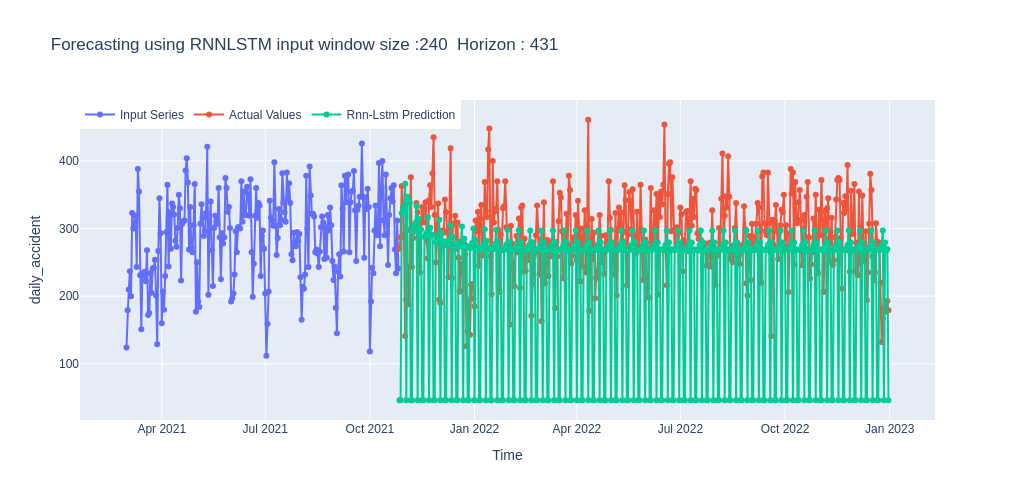

window_size :300
Horzan : 371
Evaluation of input window : 300 & Horizon : 371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━

9506

In [16]:

print('[INFO] Evaluation of RNN-LSTM Model')

test_data_df = daily_accident_df.iloc[split_index:,:]
time_axis ,test_data = test_data_df['daily'].values ,test_data_df['daily_accident'].values
# scaled_test_data = scaler.fit_transform(test_data.reshape(-1,1))


# Example usage
# transformer_ob = transformer_object  # Assuming this is defined elsewhere
evaluation_rnn_lstm_df = evaluation_of_model_RnnLstm_Model(model_name,
                                                transformer_ob=scaler,
                                                ts_test=test_data,
                                                ts_train=test_data,
                                                time_axis=time_axis)
gc.collect()


In [17]:
evaluation_rnn_lstm_df

input_window_in_hours  output_window_in_hours     MAE    RMSE   MAPE  \
0                     60                     611  108.09  148.14  37.72   
1                    120                     551  107.58  147.42  37.84   
2                    180                     491  106.72  146.76  37.48   
3                    240                     431  104.57  145.83  36.77   
4                    300                     371  103.75  144.82  36.23   

        MSE  
0  21946.09  
1  21733.97  
2  21537.32  
3  21266.30  
4  20973.06